In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

data= pd.read_csv('online_shoppers_intention.csv')

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
data_cat=data[['Month','Region','Browser','OperatingSystems','Weekend','Revenue','TrafficType','VisitorType']]
data_num=data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]

In [3]:
from sklearn import preprocessing

In [4]:
le=preprocessing.LabelEncoder()

In [5]:
data_cat_le=data_cat.apply(preprocessing.LabelEncoder().fit_transform)

In [6]:
data1=pd.concat([data_num,data_cat_le],axis=1)

In [7]:
from statsmodels.tools import add_constant as add_constant
import statsmodels.api as sm

In [165]:
x=data1.drop('Revenue',axis=1)
y=data['Revenue']

# backward elemination

In [166]:
x_1=sm.add_constant(x)
model=sm.OLS(y,x_1).fit()
model.pvalues

const                      3.891553e-22
Administrative             1.707000e-01
Administrative_Duration    3.311953e-01
Informational              2.653630e-01
Informational_Duration     6.073338e-01
ProductRelated             1.514182e-03
ProductRelated_Duration    7.305589e-04
BounceRates                9.309876e-04
ExitRates                  3.493249e-11
PageValues                 0.000000e+00
SpecialDay                 2.961076e-07
Month                      8.684224e-16
Region                     8.147478e-02
Browser                    8.129789e-02
OperatingSystems           3.907231e-03
Weekend                    1.128703e-01
TrafficType                7.389555e-01
VisitorType                7.435311e-10
dtype: float64

In [11]:
cols =list(x.columns)
pmax = 1
while (len(cols)>0):
    p =[]
    x_1 = x[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax =max(p)
    feature_with_p_max = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE =cols
print(selected_features_BE)

['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'VisitorType']


In [20]:
X=data1[['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
         'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'VisitorType']]
y=data1['Revenue']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [22]:
lr = LogisticRegression(solver = 'liblinear')

In [23]:
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)

AUC score of Train: 0.8889194585574319
[[7126  172]
 [ 830  503]]


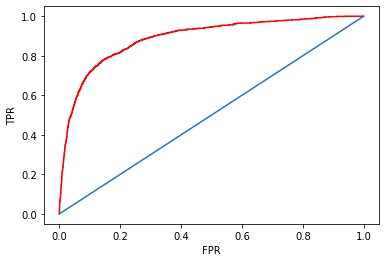

844
AUC score of Test: 0.8851800924121807
[[3054   70]
 [ 377  198]]


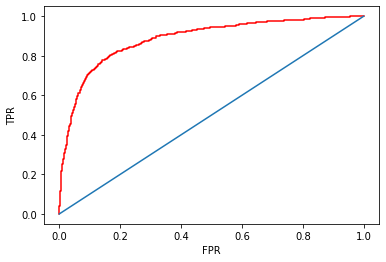

378


In [25]:
model_fit(lr, X_train, y_train, X_test,y_test)

In [56]:
X = data1.drop('Revenue', axis=1)
y = data1['Revenue']


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [58]:
lr = LogisticRegression(solver = 'liblinear')

In [59]:
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

AUC score of Train: 0.8898974880744028
[[7126  172]
 [ 820  513]]


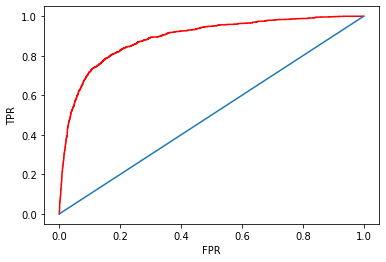

858
AUC score of Test: 0.8851093915270277
[[3057   67]
 [ 380  195]]


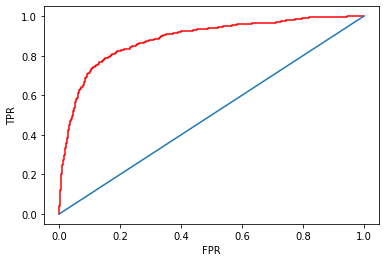

384


In [60]:
model_fit(lr, X_train, y_train, X_test,y_test)

# cross validation score 

In [61]:
# without feature selection

In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_s=ss.fit_transform(X)

In [63]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold, cross_val_score

In [64]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [65]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
cv_results = model_selection.cross_val_score(LR,X_s,y,cv = kfold,scoring = 'roc_auc')

In [35]:
print(cv_results)

[0.86805758 0.85953434 0.89921627 0.8768963  0.90512357 0.88508524
 0.88617886 0.88787987 0.88851839 0.87414188 0.90150648 0.87925179
 0.89337546 0.89358065 0.86760402]


as we gave 15cv we will get 15 cv scores

In [36]:
print(np.mean(cv_results))

0.8843967131229125


In [37]:
print(np.var(cv_results,ddof=1))

0.00017819195411051088


In [ ]:
# with feature selection

In [39]:
X=data1[['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
         'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'VisitorType']]
y=data1['Revenue']

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_s=ss.fit_transform(X)

In [41]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold, cross_val_score

In [42]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [54]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
cv_results = model_selection.cross_val_score(LR,X_s,y,cv = kfold,scoring = 'roc_auc')

In [44]:
print(cv_results)

[0.86890938 0.86093026 0.89801587 0.88006324 0.90381704 0.88209932
 0.88914477 0.88675214 0.88868692 0.87487817 0.90680354 0.88359934
 0.89655864 0.89788446 0.86706367]


as we gave 15cv we will get 15 cv scores

In [45]:
print(np.mean(cv_results))

0.8856804493338295


In [46]:
print(np.var(cv_results,ddof=1))

0.0001873263325744575


# recursive feature elimination

In [47]:
from sklearn.feature_selection import RFE

In [48]:
model=LogisticRegression()


In [69]:
rfe=RFE(model)

In [70]:
x = data1.drop('Revenue', axis=1)
y = data1['Revenue']


In [71]:
x_rfe = rfe.fit_transform(x,y)
model.fit(x_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True  True  True  True  True False
 False False  True False  True]
[ 3  9  1  8  6 10  1  1  1  1  1  5  4  2  1  7  1]


In [72]:
x.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'Region', 'Browser', 'OperatingSystems', 'Weekend', 'TrafficType',
       'VisitorType'],
      dtype='object')

# recursive feature elimination

In [73]:
X=data1[['Informational','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month','VisitorType', 'Weekend']]
y=data1['Revenue']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [75]:
lr = LogisticRegression(solver = 'liblinear')

In [76]:
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)

AUC score of Train: 0.8839522157875725
[[7152  146]
 [ 842  491]]


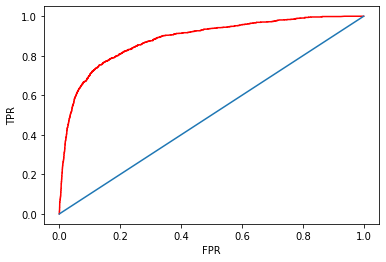

838
AUC score of Test: 0.8819632021377276
[[3060   64]
 [ 379  196]]


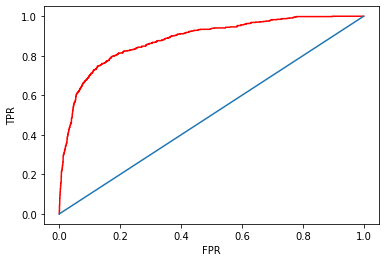

420


In [78]:
model_fit(lr, X_train, y_train, X_test,y_test)

# Forward selection

In [80]:
x=data1.drop('Revenue',axis=1)
y=data1['Revenue']

In [79]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [81]:
forward_selection(x,y)

['PageValues',
 'ProductRelated',
 'ExitRates',
 'Month',
 'VisitorType',
 'SpecialDay',
 'ProductRelated_Duration',
 'BounceRates',
 'OperatingSystems']

In [83]:
X=data1[['PageValues',
 'ProductRelated',
 'ExitRates',
 'Month',
 'VisitorType',
 'SpecialDay',
 'ProductRelated_Duration',
 'BounceRates',
 'OperatingSystems']]
y=data1['Revenue']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [117]:
lr = LogisticRegression(solver = 'liblinear')

In [118]:
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

AUC score of Train: 0.8888544930148679
[[7126  172]
 [ 829  504]]


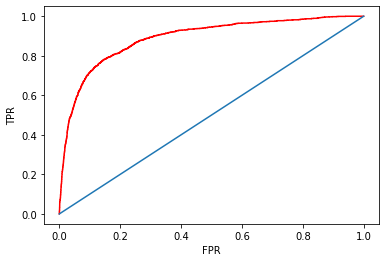

836
AUC score of Test: 0.8849613093581251
[[3054   70]
 [ 377  198]]


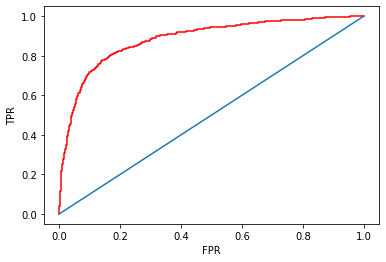

416


In [87]:
model_fit(lr, X_train, y_train, X_test,y_test)